In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

drive.mount('/content/gdrive', force_remount=True)
%cd /content/gdrive/My Drive/

data_dir = '/content/gdrive/My Drive/Rivers V2/Datasets/Original Unmodified Dataset/'

Mounted at /content/gdrive
/content/gdrive/My Drive


In [2]:
Name=[]
for file in os.listdir(data_dir):
    Name+=[file]
    
print(Name)
print(len(Name))

['Clear Glass Bottle', 'Clear Plastic Bags', 'Cans', 'Coloured Plastic Bottle', 'Clear Plastic Bottle', 'Coloured Plastic Bags']
6


In [3]:
dataset=[]
count=0
for file in os.listdir(data_dir):
    path=os.path.join(data_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        dataset+=[[image,count]]
    count=count+1

n=len(dataset)
print(n)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


1600


In [4]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [5]:
num=[]
for i in range(n):
    num+=[i]
random.shuffle(num)
print(num[0:5])

[1154, 789, 1223, 1302, 443]


In [6]:
data,labels=zip(*dataset)
data=np.array(data)
labels=np.array(labels)

train=data[num[0:(n//10)*8]]
trainlabel=labels[num[0:(n//10)*8]]

test=data[num[(n//10)*8:]]
testlabel=labels[num[(n//10)*8:]]

In [7]:
trainlabel2=to_categorical(trainlabel)

trainx,testx,trainy,testy=train_test_split(train,trainlabel2,test_size=0.2,random_state=44)

In [8]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(1024, 100, 100, 3)
(256, 100, 100, 3)
(1024, 6)
(256, 6)


In [9]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

In [10]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(6, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(6, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [12]:
his=model.fit(trainx,trainy,batch_size=8,validation_data=(testx,testy),epochs=30)


Epoch 1/30
128/128 [==============================] - 83s 542ms/step - loss: 1.5956 - accuracy: 0.3223 - val_loss: 1.4176 - val_accuracy: 0.4102
Epoch 2/30
128/128 [==============================] - 67s 524ms/step - loss: 1.2741 - accuracy: 0.4941 - val_loss: 1.2953 - val_accuracy: 0.4922
Epoch 3/30
128/128 [==============================] - 69s 538ms/step - loss: 1.0902 - accuracy: 0.5898 - val_loss: 1.2750 - val_accuracy: 0.4961
Epoch 4/30
128/128 [==============================] - 70s 545ms/step - loss: 0.9732 - accuracy: 0.6416 - val_loss: 1.1195 - val_accuracy: 0.5508
Epoch 5/30
128/128 [==============================] - 68s 534ms/step - loss: 0.8478 - accuracy: 0.6992 - val_loss: 1.1161 - val_accuracy: 0.5820
Epoch 6/30
128/128 [==============================] - 68s 531ms/step - loss: 0.7484 - accuracy: 0.7646 - val_loss: 1.0961 - val_accuracy: 0.5938
Epoch 7/30
128/128 [==============================] - 70s 544ms/step - loss: 0.6917 - accuracy: 0.7891 - val_loss: 1.0355 - val_ac

In [13]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71        40
           1       0.83      0.50      0.62        30
           2       0.72      0.61      0.66        51
           3       0.58      0.80      0.67        49
           4       0.69      0.57      0.62        51
           5       0.68      0.86      0.76        35

    accuracy                           0.68       256
   macro avg       0.70      0.68      0.67       256
weighted avg       0.69      0.68      0.67       256



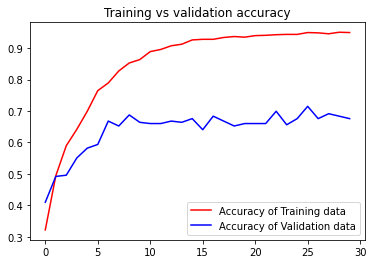

<Figure size 432x288 with 0 Axes>

In [14]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

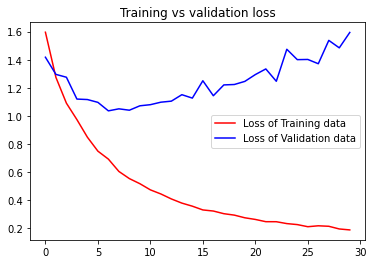

<Figure size 432x288 with 0 Axes>

In [15]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

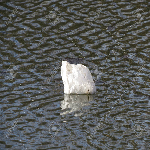

In [16]:
load_img("/content/gdrive/My Drive/L_006.jpg",target_size=(150,150))

In [17]:
image=load_img("/content/gdrive/My Drive/L_006.jpg",target_size=(100,100))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [18]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is Clear Plastic Bags.


In [19]:
print(test.shape)
pred2=model.predict(test)
print(pred2.shape)

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]

(320, 100, 100, 3)
(320, 6)


In [20]:
ANS=testlabel

In [21]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.68125
